1) Transformations.
Rotation, translation, and skew are useful operations for matching, tracking, and data augmentation
a) Write a function that takes as input an image I, rotates it by an angle θ1, and horizontally skews it by
an angle, θ2. Write the matrix formulation for image rotation R(.) and skewing S(.). Define all the
variables. Note that the origin of the coordinate system of the programming environment you use
might be different from the one shown in the lectures.

In [1]:
import numpy as np
from PIL import Image
import math
from math import cos, sin, radians
import matplotlib.pyplot as plt

# function, takes input input_image, rotates it by rotation_angle clockwise and horizontally skews to the left by skew_angle 
def ICV_rotate_and_skew(input_image, rotation_angle, skew_angle):
    # calls the function to rotate the image
    rotated_image = ICV_rotate_by_angle(input_image, rotation_angle)

    # calls the  function to horizontal skew to the rotated image
    skewed_and_rotated_image = ICV_skew_image_right(rotated_image, skew_angle)

    return skewed_and_rotated_image

# function, takes input input_image, horizontally skews to the left by skew_angle  and rotates it by rotation_angle clockwise 
def ICV_skew_and_roatte(input_image,skew_angle,rotation_angle):
    # cals the  function to horizontal skew to the rotated image
    skewed_image = ICV_skew_image_right(input_image, skew_angle)
    
    # calls the function to rotate the image
    skewed_and_rotated_image = ICV_rotate_by_angle(skewed_image, rotation_angle)
    return skewed_and_rotated_image


#function rotates image clockwise direction by angle
def ICV_rotate_by_angle(input_image, angle):
    
    image_array = np.array(input_image)
    angle_radians = math.radians(-angle)

    # Get the height and width of the original image
    height, width, _ = image_array.shape

    # Calculate new dimensions to fit the entire rotated image
    #this additional step involved preserving full image size after rotation, else some pixels will be lost after rotation
    #hence using trigonometric formulas we calculate the actual size of rotated image
    new_height = round(abs(image_array.shape[0] * math.sin(angle_radians))) + round(
        abs(image_array.shape[1] * math.cos(angle_radians)))
    
    new_width = round(abs(image_array.shape[1] * math.cos(angle_radians))) + round(
        abs(image_array.shape[0] * math.sin(angle_radians)))

    # Define the center of rotation w.r.t original image
    center_x = width // 2
    center_y = height // 2

    # create an empty array for the rotated image
    rotated_image = np.uint8(np.zeros((new_height, new_width, image_array.shape[2])))

    new_midx, new_midy = (new_width // 2, new_height // 2)

    #involves the formula used in class to get new coordinates of the rotated image, and doing the rotation w.r.t origin 
    #rotation around any point (x,y) involves, translates to (0,0), then rotate, then translate back to (x,y).
    for y in range(new_height):
        for x in range(new_width):
            new_x = (x - new_midx) * math.cos(angle_radians) - (y - new_midy) * math.sin(angle_radians)
            new_y = (x - new_midx) * math.sin(angle_radians) + (y - new_midy) * math.cos(angle_radians)
            new_x = round(new_x) + center_x
            new_y = round(new_y) + center_y
            
             #check the new coordinates are within the actual image size and fill in 
            if 0 <= new_x < width and 0 <= new_y < height:
                rotated_image[y, x] = image_array[new_y, new_x]

    return rotated_image
    
#function skews image horizontally in the rightwards  by angle
def ICV_skew_image_right(input_image, angle):
    image = np.asarray(input_image)
    angle_radians = math.radians(angle)
    row, col, num_channels = image.shape

    # Adjusting new image dimensions
    new_y_value = round(row + (col * ( 1/math.tan(angle_radians))))
    skewed_image = np.uint8(np.zeros((row, new_y_value, 3)))

    # Original image height and width
    height, width, num_channels = image.shape
    y_mid = width / 2
    x_mid = height / 2

    # New image midpoints
    height, width, num_channels = skewed_image.shape
    newimage_y_mid = width / 2
    newimage_x_mid = height / 2

    for row in range(0, image.shape[0]):
        for col in range(0, image.shape[1]):
            # calculating the distances of the current pixel from the midpoints of the original image along the y-axis and x-axis.
            y_current = y_mid - col
            x_current = x_mid - row

            #skew factor
            tangent =  1/math.tan(angle_radians)
            #calculating new indices for skewed image
            x_new = x_current
            # this part if it is + then it skews leftwards
            y_new = round(y_current - (x_current * tangent))

            #scaling back
            #reason for subtracting from the center is to ensure that the skewing is applied with respect to the center of the image.
            x_new = int(newimage_x_mid - x_new)
            y_new = int(newimage_y_mid - y_new)
            if x_new < skewed_image.shape[0] and y_new < skewed_image.shape[1]:
                skewed_image[x_new, y_new, :] = image[row, col, :]


    return skewed_image

b) Create an image that contains your name written in Arial, point 72, capital letters. This requires to have font arial.ttf in the running server . I have added the same font in the folder.

In [2]:
from PIL import Image, ImageDraw, ImageFont

#for this program to run we should have "arial.ttf" in the running server, please modify its path below before running
# if the font is not available, throw error instead of default as the out put in the report may look different due to font change.

def ICV_create_name_image(name, font_path, font_size=72):
    # Create a blank white image
    width, height = 250, 250
    image = Image.new("RGB", (width, height), "white")
    
    # Load the font
    try:
        # Load a system font with the specified size
        font = ImageFont.truetype(font_path, font_size)
    except IOError:
        print("System font not available.")
        #font = ImageFont.load_default() # just commented this part to make usre we are having arial.ttl and use it
    
    # Create a drawing context
    draw = ImageDraw.Draw(image)
    
    # Get the bounding box of the text
    text_bbox = draw.textbbox((0, 0), name, font)
    
    # Extract the size from the bounding box
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    
    # Center the text on the image
    x = (width - text_width) // 2
    y = (height - text_height) // 2
    
    # Draw the text on the image
    draw.text((x, y), name, font=font, fill="black")
    
    return image

#  name
your_name = "ANU"

# Path to the  "arial.ttf" file
#please change to actual path where the font is available in your system
font_path = "arial.ttf"

# Create an image with your name using the custom font
name_image = ICV_create_name_image(your_name, font_path)

# Save or display the image
name_image.save("ANU_NAME.jpg")
''' 
# for my testing
input_image = Image.open('ANU_NAME.jpg')
rotation_angle = 90
skew_angle = 30
result_image = ICV_rotate_and_skew(input_image, rotation_angle, skew_angle)

plt.imshow(result_image)
plt.title('Rotated and Skewed Image')
plt.axis('off')
plt.show()
 '''

" \n# for my testing\ninput_image = Image.open('ANU_NAME.jpg')\nrotation_angle = 90\nskew_angle = 30\nresult_image = ICV_rotate_and_skew(input_image, rotation_angle, skew_angle)\n\nplt.imshow(result_image)\nplt.title('Rotated and Skewed Image')\nplt.axis('off')\nplt.show()\n "

b)Skew the same image by 10, 40 and 60
degrees. Complete the process so that all the pixels have a value. Discuss in the report the
advantages and disadvantages of different approaches.

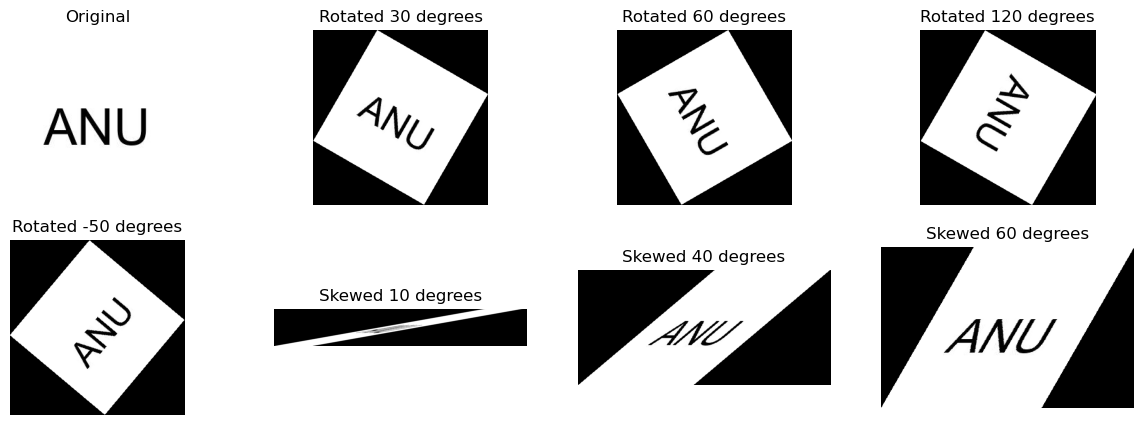

In [3]:

# function to display a set of images
def ICV_display_images(images, titles):
    fig, axes = plt.subplots(2, len(images)//2, figsize=(15, 5))
    axes = axes.flatten()

    for img, ax, title in zip(images, axes, titles):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')

    plt.show()

# open the name image
text_image = Image.open('ANU_NAME.jpg')

#  rotation angles and skew angles
rotations = [30, 60, 120, -50]
skew_angles = [10, 40, 60]

transformed_images = []
# rotate the image by specified angles
for angle in rotations:
    rotated_image = ICV_rotate_by_angle(text_image, angle)
    rotated_image = Image.fromarray(np.uint8(rotated_image))
    transformed_images.append(rotated_image)
    rotated_image.save(f"q1_rotated_image_{angle}.jpg")
    
# skew the image by specified angles
for angle in skew_angles:
    skewed_image = ICV_skew_image_right(text_image, angle)
    skewed_image = Image.fromarray(np.uint8(skewed_image))
    transformed_images.append(skewed_image)
    skewed_image.save(f"q1_skewed_image_{angle}.jpg")
        
# display the original and transformed images
titles = ["Original"] + [f"Rotated {angle} degrees" for angle in rotations] + [f"Skewed {angle} degrees" for angle in skew_angles]
ICV_display_images([text_image] + transformed_images, titles)

c) Analyse the results when you change the order of the two operators: R(S(I)) and S(R(I)).
i) Rotate the image by θ1 = 20 clockwise and then skew the result by θ2 = 50.
ii) Skew the image by θ2 = 50 and then rotate the result by θ1 = 20 clockwise.
Are the results of (i) and (ii) the same? Why?

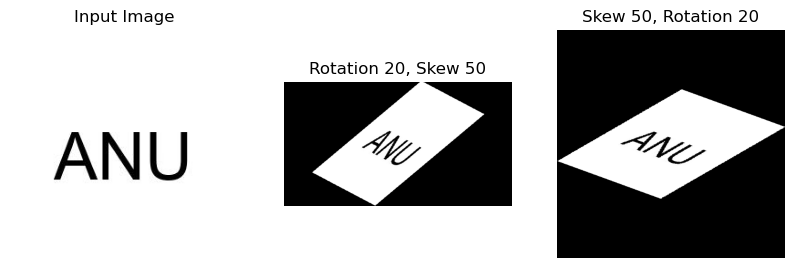

In [4]:
# for testing
input_image = Image.open('ANU_NAME.jpg')

result_image_R20_S50 = ICV_rotate_and_skew(input_image, 20, 50)
result_image_R20_S50 = Image.fromarray(np.uint8(result_image_R20_S50))
result_image_R20_S50.save(f"q1_result_image_R20_S50.jpg")

result_image_S50_R20 = ICV_skew_and_roatte(input_image, 50, 20)
result_image_S50_R20 = Image.fromarray(np.uint8(result_image_S50_R20))
result_image_S50_R20.save(f"q1_result_image_S50_R20.jpg")

# Create a figure with two subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Display the input image
axs[0].imshow(input_image)
axs[0].set_title('Input Image')
axs[0].axis('off')

# Display the first result image
axs[1].imshow(result_image_R20_S50)
axs[1].set_title('Rotation 20, Skew 50')
axs[1].axis('off')

# Display the second result image
axs[2].imshow(result_image_S50_R20)
axs[2].set_title('Skew 50, Rotation 20')
axs[2].axis('off')

# Show the plot
plt.show()